In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def kernel(x, loc):
    return 0.5*np.exp(-(25*(x - loc))**2)

In [126]:
class Station:
    def __init__(self,inital_energy):
        self.energy = inital_energy
        self.loc = np.random.rand()

class Sim:
    def __init__(self,count, inital_energy, res=100):
        self.stations = [Station(inital_energy) for _ in range(count)]
        self.x = np.linspace(0,1,100)
        self.inital_energy = inital_energy

    def get_sum(self):
        out = []
        for pos in self.x:
            total = 0
            for s in self.stations:
                total += kernel(pos,s.loc)
            out.append(total)
        return out
    
    def add_energy(self, avaliable_energy, max_energy):
        sums = self.get_sum()
        for i,pos in enumerate(self.x):
            for s in self.stations:
                k = kernel(pos,s.loc)
                new_energy = avaliable_energy * (k / sums[i]) * min(1, sums[i])
                # new_energy = avaliable_energy * (k / sums[i])*k
                s.energy += new_energy
                s.energy = min(s.energy, max_energy)

    def sub_energy(self, energy_loss_rate):
        for s in self.stations:
            s.energy -= energy_loss_rate

    def birth(self, birth_rate):
        for _ in range(birth_rate):
            self.stations.append(Station(self.inital_energy))

    def death(self):
        marked = []
        for i, s in enumerate(self.stations):
            if s.energy <= 0:
                marked.append(i)
        for i in np.flip(marked):
            self.stations.pop(i)




In [127]:
inital_energy = 3
energy_loss_rate = 1
max_energy = 5
birth_rate = 1

avaliable_energy = 1
count = 25

iterations = 1000

In [128]:
sim = Sim(count,inital_energy, avaliable_energy*100)
c = []

for i in range(iterations):
    c.append(len(sim.stations))
    sim.sub_energy(energy_loss_rate)
    sim.add_energy(avaliable_energy,max_energy)
    sim.birth(birth_rate)
    sim.death()


Text(0.5, 1.0, 'Min Energy Distrobution Function')

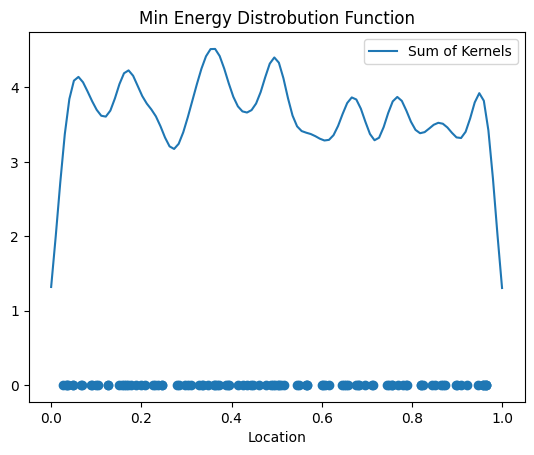

In [134]:
pos_list = [s.loc for s in sim.stations]
# pos_list = pos_squared
y = np.zeros_like(pos_list)
plt.scatter(pos_list,y)

a = [np.sum([kernel(x,pos) for pos in pos_list]) for x in sim.x]
plt.plot(sim.x,a, label="Sum of Kernels")
plt.xlabel("Location")
plt.legend()
plt.title("Min Energy Distrobution Function")


Text(0.5, 1.0, 'Height Squared Energy Distrobution Function')

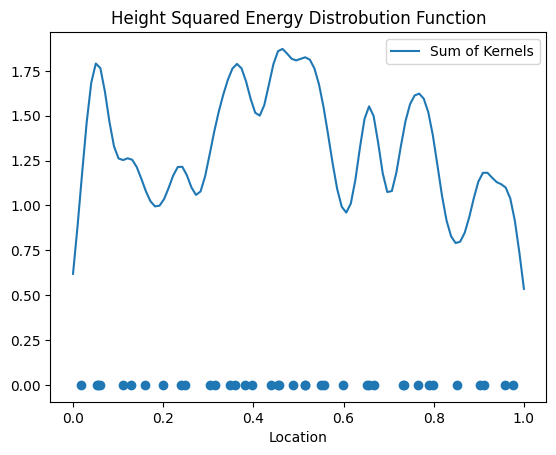

In [135]:
pos_list = pos_squared
y = np.zeros_like(pos_list)
plt.scatter(pos_list,y)

a = [np.sum([kernel(x,pos) for pos in pos_list]) for x in sim.x]
plt.plot(sim.x,a, label="Sum of Kernels")
plt.xlabel("Location")
plt.legend()
plt.title("Height Squared Energy Distrobution Function")